# Step 3: Data Processing



### Introduction

This is the **improved and precise** version of the data processing workflow for the temperature forecasting problem. In this step, we perform the necessary preprocessing techniques to prepare the data for model building.

### 1. Load and Explore Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('C:/Users/lenovo/Downloads/python exercises/ml/machine_learning_lab/dataset/merged_hn.csv')

# Display first 5 rows of the dataset
print("First 5 rows of data:")
display(df.head())

# Display general information about the DataFrame
print("\nGeneral dataset information:")
df.info()

First 5 rows of data:


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Hanoi,2015-01-01,24.0,11.4,17.7,24.0,11.4,17.7,9.4,63.8,...,17.1,7,NaN,2015-01-01T06:33:34,2015-01-01T17:26:18,0.36,Clear,Clear conditions throughout the day.,clear-day,"48820099999,48823099999,48825099999,4883109999..."
1,Hanoi,2015-01-02,22.0,11.0,16.3,22.0,11.0,16.3,9.4,65.6,...,16.2,7,NaN,2015-01-02T06:33:53,2015-01-02T17:26:56,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
2,Hanoi,2015-01-03,21.0,13.1,17.0,21.0,13.1,17.0,12.4,75.6,...,9.9,4,NaN,2015-01-03T06:34:11,2015-01-03T17:27:34,0.43,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
3,Hanoi,2015-01-04,22.6,16.9,19.3,22.6,16.9,19.3,16.1,82.0,...,5.6,3,NaN,2015-01-04T06:34:28,2015-01-04T17:28:12,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999..."
4,Hanoi,2015-01-05,23.0,18.5,20.4,23.0,18.5,20.4,18.4,88.4,...,7.9,4,NaN,2015-01-05T06:34:44,2015-01-05T17:28:51,0.50,Overcast,Cloudy skies throughout the day.,cloudy,"48820099999,48823099999,48825099999,4883109999..."



General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926 entries, 0 to 3925
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3926 non-null   object 
 1   datetime          3926 non-null   object 
 2   tempmax           3926 non-null   float64
 3   tempmin           3926 non-null   float64
 4   temp              3926 non-null   float64
 5   feelslikemax      3926 non-null   float64
 6   feelslikemin      3926 non-null   float64
 7   feelslike         3926 non-null   float64
 8   dew               3926 non-null   float64
 9   humidity          3926 non-null   float64
 10  precip            3926 non-null   float64
 11  precipprob        3926 non-null   int64  
 12  precipcover       3926 non-null   float64
 13  preciptype        2877 non-null   object 
 14  snow              3926 non-null   int64  
 15  snowdepth         3926 non-null   int64  
 16  windgust    

### 2. Process and Standardize the Datetime Column

This is a crucial step for time series data. We must ensure that the datetime column is in the correct format, then sort and set it as the index of the DataFrame.

In [2]:
# Convert 'datetime' column to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort the DataFrame in ascending order by datetime
df = df.sort_values(by='datetime')

# Set 'datetime' as the index of the DataFrame
df = df.set_index('datetime')

print("The 'datetime' column has been converted and set as index. First 5 rows after processing:")
display(df.head())

The 'datetime' column has been converted and set as index. First 5 rows after processing:


,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Hanoi,24.0,11.4,17.7,24.0,11.4,17.7,9.4,63.8,0.0,...,17.1,7,NaN,2015-01-01T06:33:34,2015-01-01T17:26:18,0.36,Clear,Clear conditions throughout the day.,clear-day,"48820099999,48823099999,48825099999,4883109999..."
2015-01-02,Hanoi,22.0,11.0,16.3,22.0,11.0,16.3,9.4,65.6,0.0,...,16.2,7,NaN,2015-01-02T06:33:53,2015-01-02T17:26:56,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
2015-01-03,Hanoi,21.0,13.1,17.0,21.0,13.1,17.0,12.4,75.6,0.0,...,9.9,4,NaN,2015-01-03T06:34:11,2015-01-03T17:27:34,0.43,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
2015-01-04,Hanoi,22.6,16.9,19.3,22.6,16.9,19.3,16.1,82.0,0.6,...,5.6,3,NaN,2015-01-04T06:34:28,2015-01-04T17:28:12,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999..."
2015-01-05,Hanoi,23.0,18.5,20.4,23.0,18.5,20.4,18.4,88.4,0.0,...,7.9,4,NaN,2015-01-05T06:34:44,2015-01-05T17:28:51,0.50,Overcast,Cloudy skies throughout the day.,cloudy,"48820099999,48823099999,48825099999,4883109999..."


### 3. Identify Data Types (Numerical vs. Categorical)

Now we classify the remaining columns into two types: **numerical** and **categorical**.

In [3]:
# Identify categorical columns (usually of type object or category)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remaining columns are numerical
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

print(f"Categorical columns: {len(categorical_cols)}")
print(categorical_cols)

print(f"\nNumerical columns: {len(numerical_cols)}")
print(numerical_cols)

Categorical columns: 8
['name', 'preciptype', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'stations']

Numerical columns: 24
['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase']


### 4. Handle Missing Values

We apply appropriate handling strategies for each data type. For numerical columns, time-based interpolation is an effective method.

In [4]:
# Count missing values per column
missing_values = df.isnull().sum()
print("Number of missing values per column (before handling):",missing_values[missing_values > 0])

Number of missing values per column (before handling): preciptype    1049
severerisk    2922
dtype: int64


In [5]:
# Handle missing values( severerisk will be filled with 0 and preciptype with 'no precipitation')
df['severerisk'].fillna(df['severerisk'].mean(), inplace=True)
df['preciptype'].fillna('no precipitation', inplace=True)
print("\nTotal missing values remaining after handling:", df.isnull().sum().sum())


Total missing values remaining after handling: 0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2404\2636791564.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['severerisk'].fillna(df['severerisk'].mean(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2404\2636791564.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

### 5. Compute and Visualize Correlation Matrix

The correlation matrix helps us understand linear relationships between numerical features. Values close to 1 or -1 indicate a strong correlation.

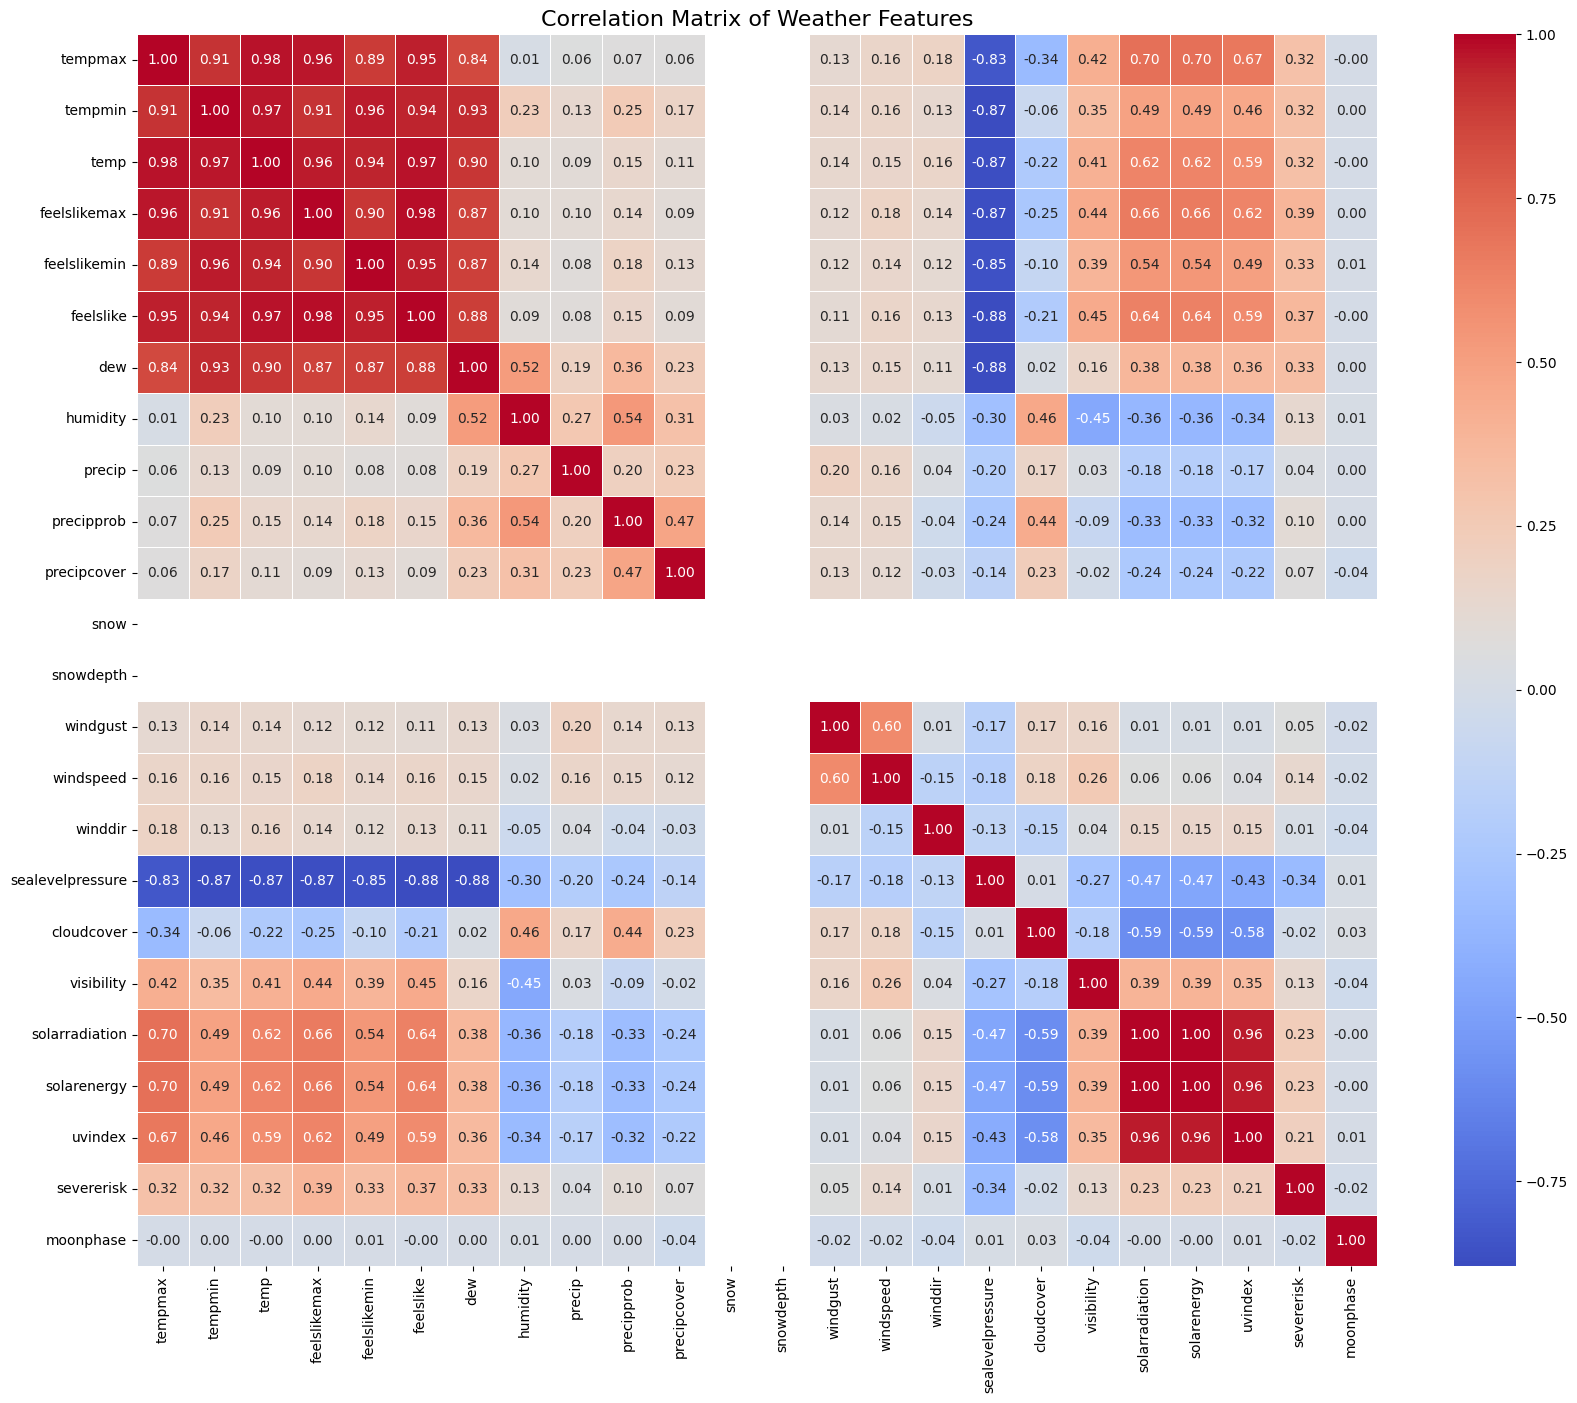


Feature correlations with temperature (temp):
temp                1.000000
tempmax             0.977702
feelslike           0.974484
tempmin             0.969585
feelslikemax        0.957865
feelslikemin        0.942531
dew                 0.902917
solarradiation      0.623311
solarenergy         0.623045
uvindex             0.588459
visibility          0.406158
severerisk          0.321299
winddir             0.160522
windspeed           0.154654
precipprob          0.147440
windgust            0.135435
precipcover         0.107197
humidity            0.100446
precip              0.090313
moonphase          -0.001684
cloudcover         -0.221102
sealevelpressure   -0.871300
snow                     NaN
snowdepth                NaN
Name: temp, dtype: float64


In [6]:
# Compute correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Weather Features', fontsize=16)
plt.show()

# Show correlation between features and temperature ('temp')
print("\nFeature correlations with temperature (temp):")
temp_correlation = correlation_matrix['temp'].sort_values(ascending=False)
print(temp_correlation)

### 6. Normalize Numerical Data

We need to scale numerical features to the same range (e.g., 0–1) so that ML algorithms perform better. Note: categorical columns will be handled in the Feature Engineering step.

In [7]:
from sklearn.model_selection import train_test_split
import os

# create data_split directory
os.makedirs("data_split", exist_ok=True)

# divide data into 70% train, 30% test
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)

# from temp_df, divide into 15% valid, 15% test
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# check shapes
print(f"Train shape: {train_df.shape}")
print(f"Valid shape: {valid_df.shape}")
print(f"Test shape:  {test_df.shape}")

# save datasets
train_df.to_csv("data_split/train.csv", index=False)
valid_df.to_csv("data_split/valid.csv", index=False)
test_df.to_csv("data_split/test.csv", index=False)


Train shape: (2748, 32)
Valid shape: (589, 32)
Test shape:  (589, 32)


In [9]:

from sklearn.preprocessing import MinMaxScaler

# Load datasets after splitting
train_df = pd.read_csv('data_split/train.csv')
valid_df = pd.read_csv('data_split/valid.csv')
test_df  = pd.read_csv('data_split/test.csv')

# Identify numerical columns
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()

# Fit scaler on training data
scaler = MinMaxScaler()
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])

# Transform validation and test using the same scaler
valid_df[numeric_cols] = scaler.transform(valid_df[numeric_cols])
test_df[numeric_cols]  = scaler.transform(test_df[numeric_cols])

print("Normalization completed(numerical columns).")
print(f"Train shape: {train_df.shape}")
print(f"Valid shape: {valid_df.shape}")
print(f"Test shape:  {test_df.shape}")

# save normalized versions
train_df.to_csv('data_split/train_normalized.csv', index=False)
valid_df.to_csv('data_split/valid_normalized.csv', index=False)
test_df.to_csv('data_split/test_normalized.csv', index=False)


Normalization completed(numerical columns).
Train shape: (2748, 32)
Valid shape: (589, 32)
Test shape:  (589, 32)


Summary

At this point, we have completed the main data processing steps:
- The dataset is now clean and free of missing values.
- We have explored relationships among features via the correlation matrix.
- Numerical features are normalized.